<a href="https://colab.research.google.com/github/harsh24895/pyTorch/blob/main/PyTorch_WorkFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#pyTorch WorkFlow

In [1]:
import torch
from torch import nn ## nn contains all of Pytorch building block for neural networks
import matplotlib.pyplot as plt

In [2]:
torch.__version__

'2.3.1+cu121'

#1.Data( Preparing and loading )

In [3]:
#Machine learning has two parts:
#1.to get into the numberical representation as a Number
#2.Build to model to learn patterns in that numberical reperesentation


#create a known parameters for linear regression that would be the (Y = a + bX)
weight = 0.6 #this is the b as per formula above line
bias = 0.3 #and this would be a for now for formula above line

start = 0
end = 1
step = 0.02 #this step is between the start and end
X =  torch.arange(start,end,step).unsqueeze(dim=1) #here is X is capital represent the Matrix or Tensor is it's smaller then it represent vector4
#also here we have mention the start,end, step so in the output you would not it would step after each 0.02 value  and unsqueeze means it will add the dimension with the brackets
y = weight * X + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3120],
         [0.3240],
         [0.3360],
         [0.3480],
         [0.3600],
         [0.3720],
         [0.3840],
         [0.3960],
         [0.4080]]))

In [4]:
len(X),len(y)

(50, 50)

#Splitting data into training and test set(important concept in the machine learning

In [5]:
#create a train/test split
# here we are setting 35 samples in test from 0.7 and rest would be the model will train/Predict and it would be 15 out of 50
train_sp = int(0.7 * len(X))
X_train, y_train = X[:train_sp],y[:train_sp]
X_test, y_test = X[train_sp:],y[train_sp:]

len(X_train), len(y_train), len(X_test), len(y_test)


(35, 35, 15, 15)

In [6]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800]]),
 tensor([[0.3000],
         [0.3120],
         [0.3240],
         [0.3360],
         [0.3480],
         [0.3600],
         [0.3720],
         [0.3840],
         [0.3960],
         [0.4080],
         [0.4200],
         [0.4320],
         [0.4440],
         [0.4560],
         [0.4680],
         [0.4800],
         [0.4920],
         [

In [7]:
#we need to visual the data in a proper way
def plot_predict(train_data = X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test,
                 predictions=None):

  """
  Plot training data, test data and compares prediction
  """
  plt.figure(figsize=(10,8))

  #Plot training data in blue
  # also here c stands for colour and b is blue and s stands for the size and later would be the label for the graph.
  plt.scatter(train_data, train_labels, c = "b", s=4, label="Traing data" )

  #Plot the testing data in Green
  plt.scatter(test_data,test_labels, c="g", s=4, label="Testing data")


  #now we are looking for predictions?
  if predictions is not None:
    #plot the predictions if they exist
    plt.scatter(test_data,predictions, c="r", s=4, label="predictions")

  #show the legend it would show the lables on matpotlib
  #here prop stands for properties
  plt.legend(prop={"size":14})


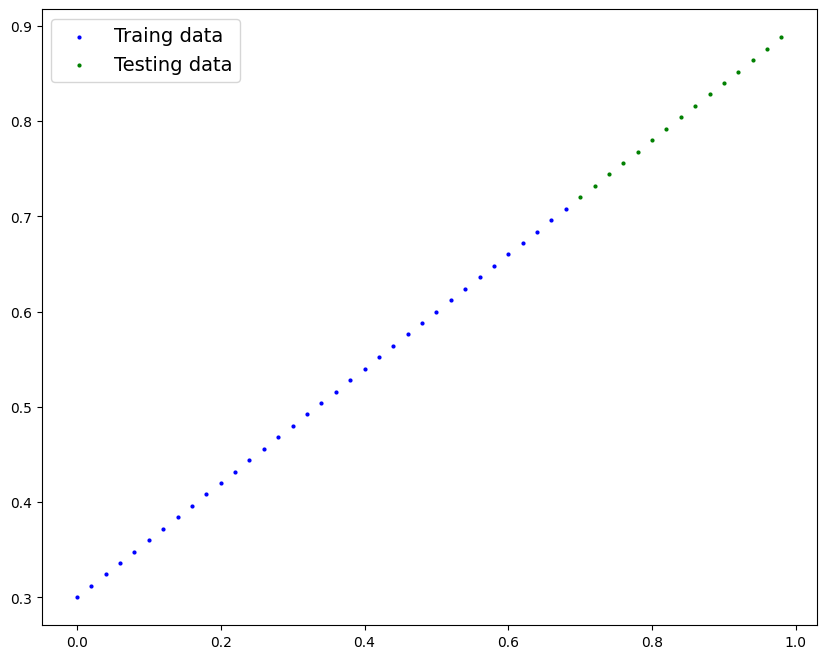

In [8]:
#run the code
plot_predict();

# and here we build a traing and testing model

#Building first Pytorch model



In [9]:
#Create a linear regression model class
class LinearRegrationModel(nn.Module): # it will inherit from nn module and it's a parent class of pytorch
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, #this will start with random weight and try to adjust it to ideal weight
                                            requires_grad=True,#this parameter updated via gradient descent?
                                            dtype=torch.float)) #it will always use default datatype float32

    self.bias = nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float))

  #this method will define the computation model
  # it will take parameter input x as train data
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias #this is linear regression formula


# This model will look at training data and adjust the random values to better represent or get closer result of weight and bias.
# To workout this we need to use the algorithms : Gradient descent and Backpropagation
#also to keep in mind pytorch has already added this two algrorithm in the backend
#need to make sure that any time we uses nn.module it required the def forward method to fetch *************************Important********************************

In [10]:
## Pytorch model building essentails
#torch.nn - contains all of the building of computational graph
#torch.nn.Parameter-
#torch.nn.module-
#torch.optim-
#def forward()- this is only method that will do the computation in the model

In [11]:
torch.randn(1)

tensor([1.0871])

#checking the content of Pytorch model

In [12]:

#we can check the model what inside the parameter is .parameters().
torch.manual_seed(42)

#create a instance of the model
model1 = LinearRegrationModel()

#check the parameters
list(model1.parameters())

#the below output parameter would change if we set randn instead of manual seed

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [13]:
#list the named parameters
model1.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [14]:
#Now we need to get the predicted number around the define value which we have metion for Weight and Bias above and see below
weight,bias

(0.6, 0.3)

In [15]:
#also we are going to use the X_test and y_test below
# so here we are getting the values from and above look for both variable
X_test, y_test

(tensor([[0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.7200],
         [0.7320],
         [0.7440],
         [0.7560],
         [0.7680],
         [0.7800],
         [0.7920],
         [0.8040],
         [0.8160],
         [0.8280],
         [0.8400],
         [0.8520],
         [0.8640],
         [0.8760],
         [0.8880]]))

In [16]:
 # To make prediction we are using 'torch.inference_mode()'
 # so here it will take input and then it will predict: so as input it will X_test to predit y_test
 # we need to use the forward() method
#**********************Important too if the def method is not align in line above code for forward() need to align it with shift+tab
with torch.inference_mode(): #the only thing with inference_mode is that we don't need to keep track of the gradiant(required_grad=True) and also there is another method too torch.no_grad() but inteference is better than no_grad
    y_predit =model1(X_test)
y_predit  # so below are the predictions

#another way
with torch.no_grad():
   y_predit =model1(X_test)
y_predit

tensor([[0.3645],
        [0.3712],
        [0.3780],
        [0.3847],
        [0.3914],
        [0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [17]:
y_test #here notice the y_test and y_predit output prediction little similar prediction

tensor([[0.7200],
        [0.7320],
        [0.7440],
        [0.7560],
        [0.7680],
        [0.7800],
        [0.7920],
        [0.8040],
        [0.8160],
        [0.8280],
        [0.8400],
        [0.8520],
        [0.8640],
        [0.8760],
        [0.8880]])

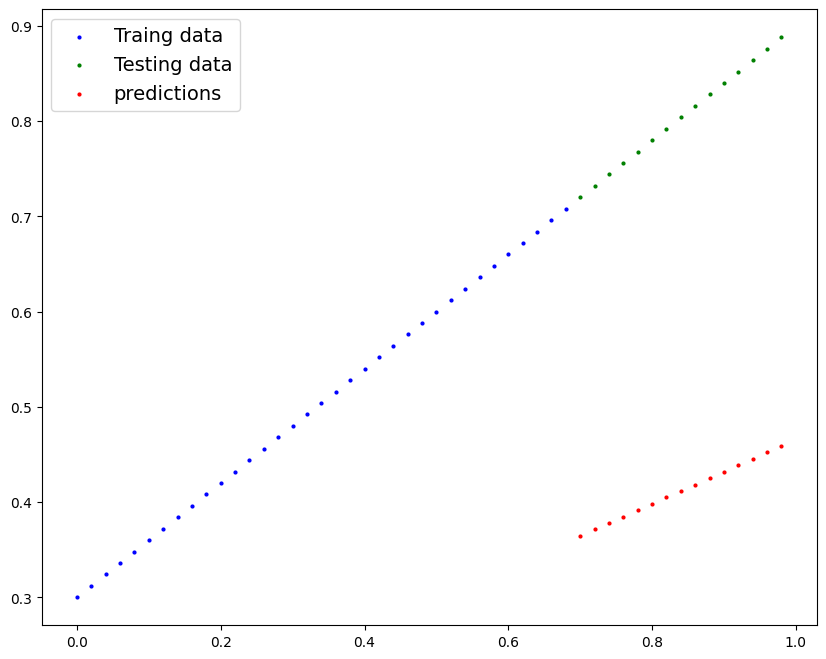

In [18]:
plot_predict(predictions=y_predit) #and here is the predictions below that the model has comeup with

#Train the model


In [19]:
# The main aspect here is that we need to move from unknown parameters model(these may be random) to known paratmers
# to poor representation of data to better representation of data

#to measure the poor and wrong predicion model we are using the loss function

#*****Lost function is also called cost function or criterion in different area.********************

# we need 1.Lost function
#2.Optimizer: take account into the  loss model and adjust the parameters(weight and bias) to improve the loss function
#2.1 inside the optimizer we need to set two parameter
    #-params: the model parameters like to optimize params=model1.parameters()
    #-lr(leraning rate): this the Hyperparameter this value is set the by us Machine learning Engineers see below for explation (if a small lr results in small changes in step, a large lr results in large changes in step)
#3. Also we need Traing and Testing loop


In [20]:
list(model1.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [21]:
#this will check out the model parameters and this will set the value itself
model1.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [22]:
#setup the loss function is Lost funcation there is another function called  L1loss that means absolute error (MAE) between i/p X to o/p y.

loss_fn = nn.L1Loss()

#setup the optimizer and it have other algorithms too torch.optim.SGD and all others look documentation
optimizer = torch.optim.SGD(params=model1.parameters(), #optim SGD will adjust the value to close enough to reduce the loss function
                            lr=0.01) #lr = learning rate so higher the lr it adjust higher to the parameters in this value tensor([0.3367]) if it lr =0.001 it will adjust 6, if lr=0.0001 it will adjust 7


#3.Building the training and testing loop

In [23]:
#couple of thing for traing loop(and testing loop)
#1.loop trough the data
#2. Forward pass - this involves data moving through our model using the forward() method ******This is also called Forward propagation********
#3.Calcultate the loss(compare forward pass prediction to ground level)
#4.optimizer zero grad
#5. loss backward - move backward through the network to calculate the gradient pf each parameter this is ***(back prapogation)**
#6. Optimizer step - use the optimizer to adjust our model parameter to improve the loss this is ***(Gradient descent)**

In [66]:
#an epoch is one loop through the data (this is the hyperparameter becasue we set ourselves)
epochs = 1
#Traing the model
#1.loop through the data
for epoch in range(epochs):
  #set the model to traing mode
  model1.train() #train mode in pytorch set all the parameters that require gradients to require gradience

  #1.forward pass
  y_pred = model1(X_train)

  #2.Calulate the loss - y_pred- input is first then y_train is the output
  loss = loss_fn(y_pred, y_train)
  print(f"Loss:{loss}") #we are printing the loss

  #3.optimizer zero grad
  optimizer.zero_grad() # For each epoch we need to get the loop to zero so we need optimizer to set the zero

  #4.Perform back prapogation on the loss with respect to the parameters of model
  # also Back prapogation is calculating the derivative curve or each parameters in the model
  loss.backward()

  #5.Optimizer step(Perform the gradient descent)
  optimizer.step() #default how the optimizer change will acculumate through the loop and need to zero them above in step 3


  model1.eval()# this will turn off gradient tracking

  #Print out the model state_dict()
  print(model1.state_dict())

Loss:0.053090792149305344
OrderedDict([('weights', tensor([0.4045])), ('bias', tensor([0.3242]))])


In [67]:
model1.state_dict()


OrderedDict([('weights', tensor([0.4045])), ('bias', tensor([0.3242]))])

In [26]:
weight,bias #we need to get the parameter closer to the model1 values above


(0.6, 0.3)

In [69]:
with torch.inference_mode(): # we are setting new inference to see the new graph
  y_predit_newdata = model1(X_test)


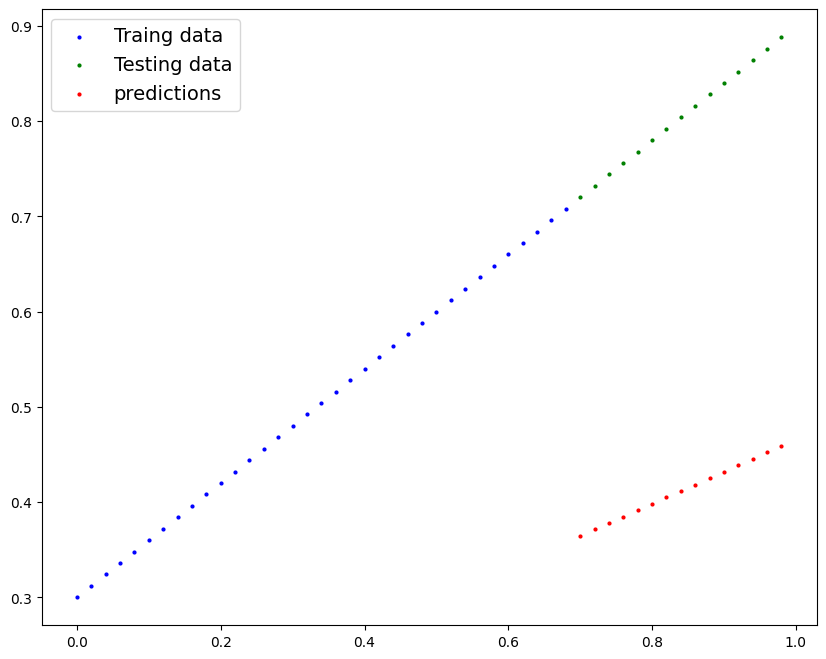

In [68]:
plot_predict(predictions=y_predit)#this is the old data and predictions

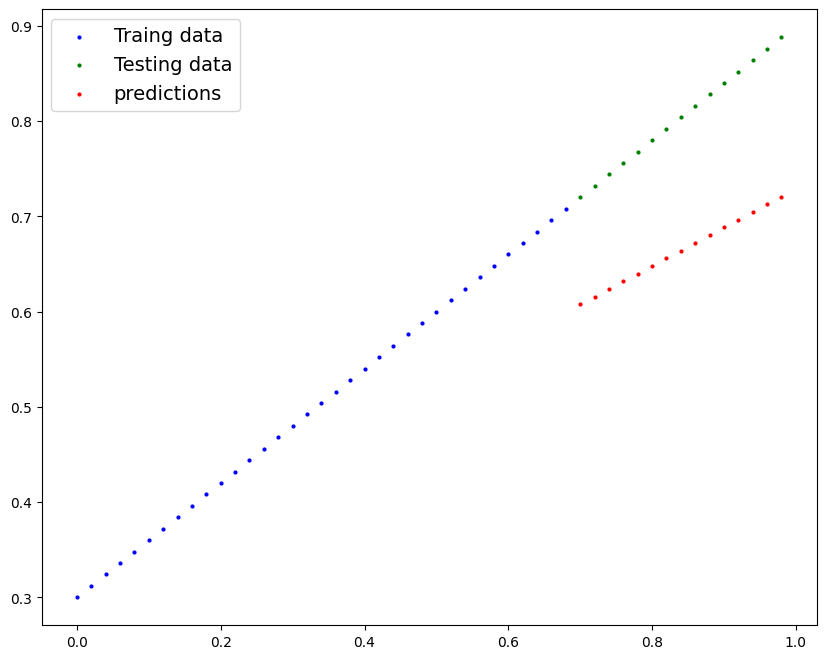

In [70]:
plot_predict(predictions=y_predit_newdata) #here is a new data with new training set and predictions